# Customer Segmentation

This workbook is to segement the customers with various info into several clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import metrics

aisle_path = 'E:\Sebnewrepo\Data/aisles.csv'
aisles = pd.read_csv(aisle_path)

departments_path = 'E:\Sebnewrepo\Data/departments.csv'
departments = pd.read_csv(departments_path)

order_products_path = 'E:\Sebnewrepo\Data/order_products.csv'
order_products = pd.read_csv(order_products_path)

orders_path = 'E:\Sebnewrepo\Data/orders.csv'
orders = pd.read_csv(orders_path)

products_path = 'E:\Sebnewrepo\Data/products.csv'
products = pd.read_csv(products_path)

### 1. Users and Aisles

#### 1.1 Prepare the table

In [2]:
joint = order_products.merge(orders, on = 'order_id', how = 'left')
joint = joint.merge(products, on = 'product_id', how = 'left')
joint.head()

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,202279,3,5,9,8.0,Organic Egg Whites,86,16
1,2,28985,2,202279,3,5,9,8.0,Michigan Organic Kale,83,4
2,2,9327,3,202279,3,5,9,8.0,Garlic Powder,104,13
3,2,45918,4,202279,3,5,9,8.0,Coconut Butter,19,13
4,2,30035,5,202279,3,5,9,8.0,Natural Sweetener,17,13


In [3]:
df_joint = pd.DataFrame({
    'user_id' : joint['user_id'],
    'aisle_id' : joint['aisle_id']
})
df_joint01 = df_joint.merge(aisles, on = 'aisle_id', how = 'left')
df_joint01.head()

,user_id,aisle_id,aisle
0,202279,86,eggs
1,202279,83,fresh vegetables
2,202279,104,spices seasonings
3,202279,19,oils vinegars
4,202279,17,baking ingredients


In [4]:
#pivot the table:
#df_joint02 = df_joint01.drop(['aisle_id'], axis = 1)
new_df = pd.pivot_table(df_joint01, 
                   index = ['user_id'],
                   columns = ['aisle'],
                   aggfunc = 'count')
new_df = new_df.fillna(0)
new_df.head()

aisle_id                               \
aisle   air fresheners candles asian foods baby accessories   
user_id                                                       
1                          0.0         0.0              0.0   
2                          0.0         3.0              0.0   
3                          0.0         0.0              0.0   
4                          0.0         0.0              0.0   
5                          1.0         4.0              0.0   

                                                               \
aisle   baby bath body care baby food formula bakery desserts   
user_id                                                         
1                       0.0               0.0             0.0   
2                       0.0               0.0             0.0   
3                       0.0               0.0             0.0   
4                       0.0               0.0             0.0   
5                       0.0               0.0             0.0   

                                                                       ...  \
aisle   baking ingredients baking supplies decor beauty beers coolers  ...   
user_id                                                                ...   
1                      0.0                   0.0    0.0           0.0  ...   
2                      2.0                   0.0    0.0           0.0  ...   
3                      0.0                   0.0    0.0           0.0  ...   
4                      0.0                   0.0    0.0           0.0  ...   
5                      0.0                   0.0    0.0           0.0  ...   

                                                                  \
aisle   spreads  tea tofu meat alternatives tortillas flat bread   
user_id                                                            
1           1.0  0.0                    0.0                  0.0   
2           3.0  1.0                    1.0                  0.0   
3           4.0  1.0                    0.0                  0.0   
4           0.0  0.0                    0.0                  1.0   
5           0.0  0.0                    0.0                  0.0   

                                                                    \
aisle   trail mix snack mix trash bags liners vitamins supplements   
user_id                                                              
1                       0.0               0.0                  0.0   
2                       0.0               0.0                  0.0   
3                       0.0               0.0                  0.0   
4                       0.0               0.0                  0.0   
5                       0.0               0.0                  0.0   

                                                          
aisle   water seltzer sparkling water white wines yogurt  
user_id                                                   
1                                 0.0         0.0    2.0  
2                                 2.0         0.0   42.0  
3                                 2.0         0.0    0.0  
4                                 1.0         0.0    0.0  
5                                 0.0         0.0    3.0  

[5 rows x 134 columns]

In [5]:
# drop the multi-level index
new_df.columns = new_df.columns.droplevel()
new_df = pd.DataFrame(
    new_df.values,
    index = new_df.index,
    columns = new_df.columns
)
new_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


#### 1.2 Customer Segmentation with PCA & Clustering 

In [6]:
def pca_process(n, df):
    pca = decomposition.PCA(n_components = n)
    pca_data = pca.fit_transform(df)

    ## get PCs, show Explained variance per principal component
    pca_df = pd.DataFrame(pca_data)
    print('Explained variance per principal component:',pca.explained_variance_ratio_)
    return pca_df

def standard(df):
    ss = StandardScaler()
    df1 = pd.DataFrame(ss.fit_transform(df))
    return df1

def kmeans(k, df):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    y_kmeans = kmeans.fit_predict(df)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    sse = kmeans.inertia_
    return (y_kmeans, centers, labels, sse)

# CH Score Check
def CH_Score(df):
    i = []
    CH_score = []
    max_k = len(pca_data1.index)
    for k in range(2,10):
        y_kmeans, centers, labels, sse= kmeans(k,df)
        m = metrics.calinski_harabasz_score(df, labels)
        i.append(k)
        CH_score.append(m)

    plt.figure()  
    plt.plot(i,CH_score)  
    plt.xlabel("kmeans-k")  
    plt.ylabel("calinski_harabaz_score")  
    plt.title("Performance of K") 
    return
# SSE
def sse(df):
    k_range = range(1,15)
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(new_df)
        sse.append(kmeans.inertia_)
    plt.plot(k_range, sse)

1.2.1 Try PCA to reduct the demension and evaluate the performance

In [7]:
##Try n = 2
pca_data1 = pca_process(2, new_df)
pca_data1

Explained variance per principal component: [0.4786378  0.09640584]


,0,1
0,-24.811636,3.449192
1,10.331587,39.529398
2,-9.247469,2.382710
3,-29.242883,-0.880035
4,-19.186003,-3.037863
...,...,...
206204,-20.426644,5.176024
206205,-6.163290,-0.200355
206206,7.312526,7.660421
206207,82.725416,20.649787


In [8]:
##Try n = 3
pca_data2 = pca_process(3, new_df)
pca_data2

Explained variance per principal component: [0.4786378  0.09640584 0.05210072]


,0,1,2
0,-24.811636,3.449193,-1.611665
1,10.331587,39.529396,4.610839
2,-9.247469,2.382710,-11.076953
3,-29.242883,-0.880035,-1.984266
4,-19.186003,-3.037864,0.186785
...,...,...,...
206204,-20.426644,5.176025,0.814297
206205,-6.163290,-0.200361,5.266045
206206,7.312526,7.660423,7.951784
206207,82.725416,20.649792,8.150931


Try Kmeans to cluster the data

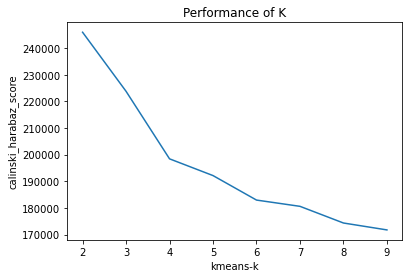

In [9]:
# Use 2 demension data First
CH_Score(pca_data1)

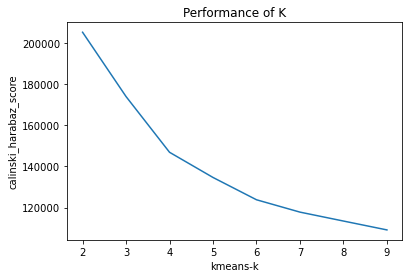

In [10]:
# Use 3 demension data
CH_Score(pca_data2)

The CH score says 2 cluster is the best. Technically it does not make much sense.
Apply Standardization after PCA

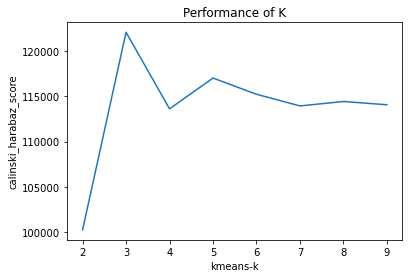

In [11]:
# Use 2 demension data
pca_data1 = standard(pca_data1)
CH_Score(pca_data1)

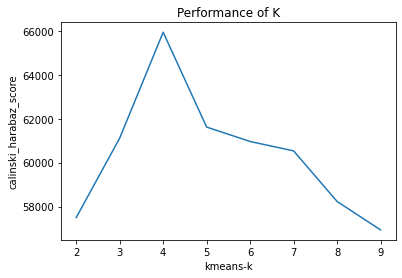

In [12]:
# Use 3 demension data
pca_data2 = standard(pca_data2)
CH_Score(pca_data2)

According to the figures, when utilizing StandardScaler, the CH Score makes more sense compared with the previous attempt. if demension = 2, the 3 clusters is the best solution. If demension = 3, the 4 cluster is the best solution.

Plot these two result

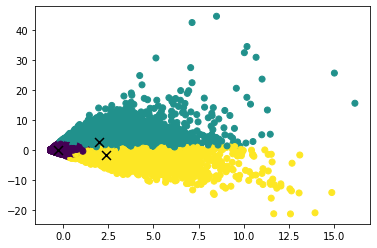

In [13]:
# n = 2, k = 3
y_kmeans, centers, label, sse = kmeans(3, pca_data1)

plt.scatter(pca_data1[0],pca_data1[1], c = y_kmeans, cmap = 'viridis' )
plt.scatter(centers[:,0], centers[:, 1], c='black', s=80, marker='x')

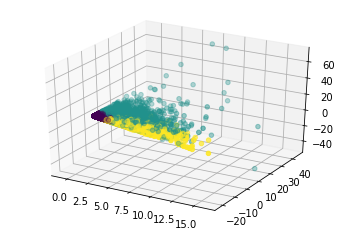

In [14]:
# n = 3, k = 4
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(pca_data2[0], pca_data2[1], pca_data2[2], c = y_kmeans, cmap = 'viridis')

#### 1.3 Customer Segmentation Analysis

Use the PCA Data to analyze first

1.3.1 Result from 2-demension transformed table

In [15]:
# Reconstruct the result
y_kmeans, centers, label, sse = kmeans(3, pca_data1)

In [16]:
# add label to original df
new_df1 = new_df
new_df1['label'] = label
new_df1.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,label
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0


In [17]:
label_0 = new_df1[new_df1.label == 0]
label_1 = new_df1[new_df1.label == 1]
label_2 = new_df1[new_df1.label == 2]

print('How many users are assgined to each label?')
print('Label 0: '+ str(label_0.shape[0]))
print('Label 1: '+ str(label_1.shape[0]))
print('Label 2: '+ str(label_2.shape[0]))

How many users are assgined to each label?
Label 0: 183540
Label 1: 12995
Label 2: 9674


For here we try to see the 

In [18]:
#see the distribution of the total count of each aisle in each label
l = label_0.mean().sort_values(ascending = False)
print('Customer buying preferrence of Label 0')
l.head(10)

Customer buying preferrence of Label 0


aisle
fresh fruits                     10.828931
fresh vegetables                 10.128005
packaged vegetables fruits        5.669854
yogurt                            4.198687
packaged cheese                   3.326256
water seltzer sparkling water     3.095581
milk                              2.872518
chips pretzels                    2.609687
soy lactosefree                   2.119571
bread                             2.008766
dtype: float64

In [19]:
l = label_1.mean().sort_values(ascending = False)
print('Customer buying preferrence of Label 1')
l.head(10)

Customer buying preferrence of Label 1


aisle
fresh vegetables              105.258638
fresh fruits                   72.468103
packaged vegetables fruits     36.620392
yogurt                         16.811466
packaged cheese                15.487187
milk                           13.099808
fresh herbs                    11.982070
soy lactosefree                11.303578
frozen produce                  9.906195
bread                           8.933590
dtype: float64

In [20]:
l = label_2.mean().sort_values(ascending = False)
print('Customer buying preferrence of Label 2')
l.head(10)

Customer buying preferrence of Label 2


aisle
fresh fruits                     89.249121
yogurt                           53.596341
fresh vegetables                 35.342154
packaged vegetables fruits       33.830784
milk                             23.382779
packaged cheese                  21.677176
water seltzer sparkling water    20.046206
chips pretzels                   17.367066
energy granola bars              15.160017
baby food formula                14.430225
dtype: float64

From here we can see that the customer behaviors in three labels are similar. So maybe using PCA here do not bring more assistance.

#### 1.3 Customer Segmentation with Clustering Only

In [21]:
# directly try kmeans and evaluate its performance 
new_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,label
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0


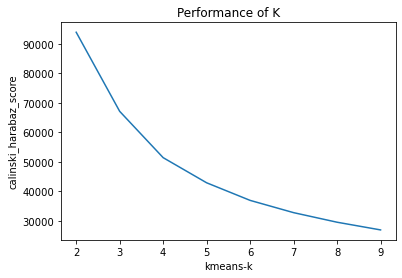

In [22]:
#Use CH Score and SSE to evaluate the number of clusters
CH_Score(new_df)

In [23]:
sse(new_df)

TypeError: 'float' object is not callable

2 clusters or 3 clusters might be well here

In [ ]:
# 2 Clusters Analysis
y_kmeans, centers, label, sse = kmeans(2, new_df)
new_df1 = new_df
new_df1['label'] = label
new_df1.head()

In [ ]:
label_0 = new_df1[new_df1.label == 0]
label_1 = new_df1[new_df1.label == 1]

print('How many users are assgined to each label?')
print('Label 0: '+ str(label_0.shape[0]))
print('Label 1: '+ str(label_1.shape[0]))

In [ ]:
#see the distribution of the total count of each aisle in each label
l = label_0.mean().sort_values(ascending = False)
print('Customer buying preferrence of Label 0')
l.head(10)

In [ ]:
l1 = label_1.mean().sort_values(ascending = False)
print('Customer buying preferrence of Label 1')
l1.head(10)

In [ ]:
plt.figure()  
plt.plot(l, "-b", label="Label 0")
plt.plot(l1, "-r", label="Label 1")
plt.xlabel("aisle")  
plt.ylabel("avg buying")  
plt.legend(loc="upper right")
plt.title("Label 0 and Label 1 Customer Stats") 

#### 1.4 Customer Segmentation Further Explore
From this two clusters, we can make an attempt that: our customers can be divided into two groups: group 1: Small Quantity Purchasing, group 2: large Quantity Purchasing. Further more, is customers in group 1 has higher number or frequency of purchases than people in group 2

In [ ]:
new_df.head()

In [ ]:
joint = pd.DataFrame({
    'label': new_df['label']
})
joint = joint.reset_index()
joint.columns = ['user_id','label']
joint.head()

In [ ]:
# join the order.csv and the table above
joint02 = orders.merge(joint,  on = 'user_id', how = 'left')
joint02.head()

In [ ]:
label_0 = joint02[joint02.label == 0]
label_1 = joint02[joint02.label == 1]

a = label_0['order_id'].groupby(label_0['user_id']).count()
print('Average time of purchases of Label 0')
print(a.mean())
a

In [ ]:
a = label_0['days_since_prior_order'].groupby(label_0['user_id']).mean()
print('Average time interval of purchases of Label 0')
print(a.mean())
a

In [ ]:
a = label_1['order_id'].groupby(label_1['user_id']).count()
print('Average time of purchases of Label 1')
print(a.mean())
a

In [ ]:
a = label_1['days_since_prior_order'].groupby(label_1['user_id']).mean()
print('Average time interval of purchases of Label 1')
print(a.mean())
a

##### Conclusion
From the attempt above, the customers can be divided into two groups:

Group 1 (Normal Customer): The customers' time of purchase is 13.2, and the interval period between two purchase is 16.2 days, 90% Customers are in this group

Group 2 (Frequent Customer): The customers' time of purchase is 48.8 (much higher than group 1), and the interval period between two purchase is 7.9 days (half of Group 1), 10% Customers are in this group

#### 1.5 Is that other measurement or approach to analyze the customer segmentation?

How about binary table for the original data set: if user have purchase on the aisle, just count as 1, instead of certain quantity?

In [ ]:
df_joint01_bin = df_joint01
df_joint01_bin.loc[df_joint01_bin['aisle_id'] > 0, 'aisle_id'] = 1
df_joint01_bin.head()

In [ ]:
new_df_bin = pd.pivot_table(df_joint01, 
                   index = ['user_id'],
                   columns = ['aisle'],
                   aggfunc = 'max')
new_df_bin = new_df_bin.fillna(0)
new_df_bin.columns = new_df_bin.columns.droplevel()
new_df_bin = pd.DataFrame(
        new_df_bin.values,
        index = new_df_bin.index,
        columns = new_df_bin.columns
)
new_df_bin.head()

In [ ]:
#Show CH Score of this table
CH_Score(new_df_bin)    

In [ ]:
sse(new_df_bin)

In [ ]:
y_kmeans, centers, label, sse = kmeans(2, new_df_bin)
new_df_bin1 = new_df_bin
new_df_bin1['label'] = label
new_df_bin1.head()

In [ ]:
label_0 = new_df_bin1[new_df_bin1.label == 0]
label_1 = new_df_bin1[new_df_bin1.label == 1]

print('How many users are assgined to each label?')
print('Label 0: '+ str(label_0.shape[0]))
print('Label 1: '+ str(label_1.shape[0]))

In [ ]:
l = label_0.mean().sort_values(ascending = False)
print('Customer buying preferrence of Label 0')
l.head(10)

In [ ]:
label_1.label = 0
l1 = label_1.mean().sort_values(ascending = False)
print('Customer buying preferrence of Label 1')
l1.head(10)

In [ ]:
# Plot
plt.figure()  
plt.plot(l, "-b", label="Label 0")
plt.plot(l1, "-r", label="Label 1")
plt.xlabel("aisle")  
plt.ylabel("avg buying")  
plt.legend(loc="upper right")
plt.title("Label 0 and Label 1 Customer Stats") 

In [ ]:
joint = pd.DataFrame({
    'label': new_df_bin1['label']
})
joint = joint.reset_index()
joint.columns = ['user_id','label']
joint.head()

In [ ]:
joint02 = orders.merge(joint,  on = 'user_id', how = 'left')
joint02.head()

In [ ]:
label_0 = joint02[joint02.label == 0]
label_1 = joint02[joint02.label == 1]

a = label_0['order_id'].groupby(label_0['user_id']).count()
print('Average time of purchases of Label 0')
print(a.mean())
a

In [ ]:
a = label_0['days_since_prior_order'].groupby(label_0['user_id']).mean()
print('Average time interval of purchases of Label 0')
print(a.mean())
a

In [ ]:
a = label_1['order_id'].groupby(label_1['user_id']).count()
print('Average time of purchases of Label 1')
print(a.mean())
a

In [ ]:
a = label_1['days_since_prior_order'].groupby(label_1['user_id']).mean()
print('Average time interval of purchases of Label 1')
print(a.mean())
a